In [1]:
from eval_plots import *

In [2]:
get_plot_df_subsets(["EA", "base"], ["Z", "Zwa"])

,size,adapters,ppl,subset
0,8B,base,22.261793,Z
1,8B,EA,32.970656,Z
0,8B,base,21.401924,Zwa
1,8B,EA,32.212335,Zwa


In [2]:
df = (get_plot_df(["EA", "base", "bible", "Zwa"], len_data=10))
df

,size,adapters,ppl
0,8B,base,39.993184
1,8B,EA,55.946963
2,8B,bible,38.946303
3,70B,base,31.141793
4,70B,EA,38.990055
5,70B,bible,28.573392
6,8B,Zwa,30.479864
7,70B,Zwa,19.796149


In [18]:
def plot_ppl(data, figsize=(10, 8)):
    """
    Plots PPL values by size and adapter with a horizontal baseline for the "base" adapter,
    and separate subplots for each size. Includes a unified legend.

    Parameters:
    - data: pandas DataFrame containing 'size', 'adapters', and 'ppl' columns.
    - If only one 'size' value, the DF needs to contain a 'subset' column, with different subsets
    """
    unique_sizes = data['size'].unique()
    category_name = "size"
    if len(unique_sizes) == 1:
        unique_sizes = data["subset"].unique()
        category_name = "subset"
    fig, axes = plt.subplots(1, len(unique_sizes), figsize=figsize, sharey=True)

    # colors = {adapter: uzh_colors[i % len(uzh_colors)] for i, adapter in enumerate(data['adapters'].unique())}
    colors = {adapter: uzh_colors[0] for adapter in data["adapters"].unique()}
    colors["base"] = uzh_colors[-1]
    
    # Dictionary to store handles for legend
    legend_handles = {}

    for ax, cat in zip(axes, unique_sizes):
        # Subset the data for the current size
        size_data = data[data[category_name] == cat]
        
        # Extract "base" adapter's PPL for the horizontal line
        base_ppl = size_data[size_data['adapters'] == 'base']['ppl'].values[0]
        base_line = ax.hlines(
            y=base_ppl,
            xmin=-0.5,
            xmax=len(size_data['adapters'].unique()) - 1,
            colors=colors['base'],
            label="Base"
        )
        if "Base" not in legend_handles:
            legend_handles["Baseline"] = base_line
        
        # Filter non-"base" adapters
        non_base_adapters = size_data[size_data['adapters'] != 'base']
        num_non_base_adapters = len(non_base_adapters)
        bar_width = 0.8 # 0.8 / num_non_base_adapters if num_non_base_adapters > 0 else 0.8
        
        # Create bars for non-"base" adapters
        for i, adapter in enumerate(non_base_adapters['adapters'].unique()):
            adapter_data = non_base_adapters[non_base_adapters['adapters'] == adapter]
            bar = ax.bar(
                [i],
                adapter_data['ppl'],
                bar_width,
                color=colors[adapter],
                alpha=0.9
            )
            if "LORA Adapters" not in legend_handles:  # Collect handles only once
                legend_handles["LORA Adapters"] = bar[0]
        
        # Configure the x-axis for this subplot
        ax.set_xticks([i for i in range(len(non_base_adapters['adapters'].unique()))])
        ax.set_xticklabels(non_base_adapters['adapters'].unique(), rotation=45)
        ax.set_title(f"{category_name}: {cat}".title())
        ax.set_xlabel("")
        ax.set_ylabel("PPL" if cat == unique_sizes[0] else "")
        ax.grid(True, axis="y", linestyle='--', alpha=0.6)
    
      # Add a single shared legend at the bottom
    fig.legend(
        handles=legend_handles.values(),
        labels=legend_handles.keys(),
        title="",
        loc='lower center',
        ncol=len(legend_handles),  # Arrange legend in a single row
        bbox_to_anchor=(0.5, -0.05)
    )
    # Adjust layout and display the plots
    plt.tight_layout()
    return fig
    plt.show()


In [20]:
df = (get_plot_df(["EA", "base", "bible", "Zwa"], len_data=3405))

df

,size,adapters,ppl
0,8B,base,27.363183
1,8B,EA,38.475699
2,8B,bible,31.100562
3,70B,base,22.155320
4,8B,Zwa,22.643369
5,70B,EA,28.991850
6,70B,bible,22.545224
7,70B,Zwa,17.481868


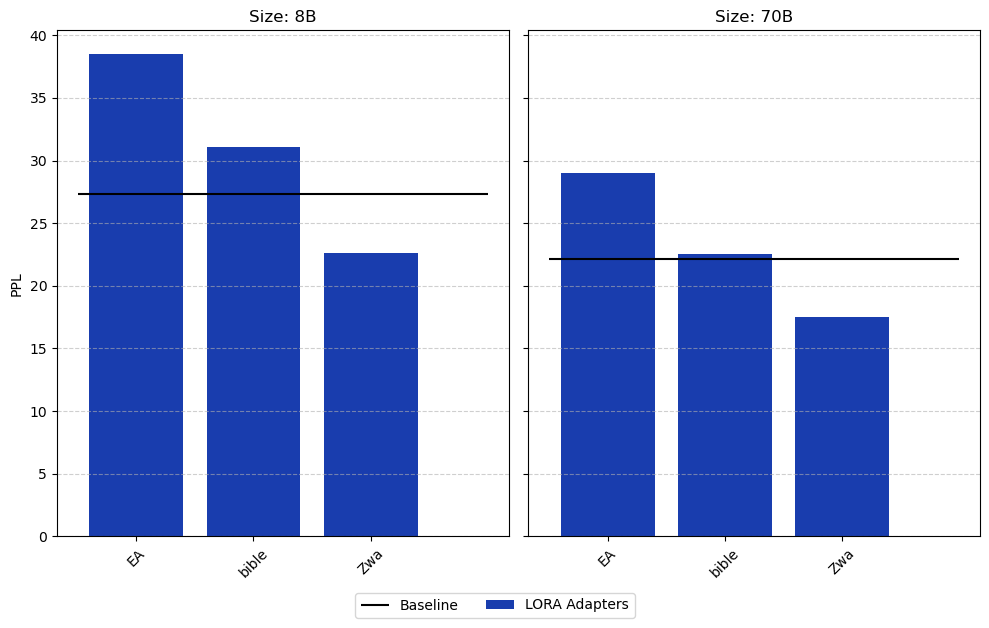

In [21]:
import os
fig = plot_ppl(df, figsize=(10, 6))
if False:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "pplPretrain.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [15]:
df = get_plot_df_subsets(["EA", "base", "bible", "Zwa", "Z"], ["EA", "Z", "Zwa"])
df

,size,adapters,ppl,subset
0,8B,base,21.330664,EA
1,8B,EA,28.558853,EA
2,8B,Zwa,15.476289,EA
3,8B,Z,22.683635,EA
4,8B,bible,24.283017,EA
0,8B,Z,21.411119,Z
1,8B,base,22.261793,Z
2,8B,Zwa,16.027580,Z
3,8B,EA,32.970656,Z
4,8B,bible,26.508398,Z


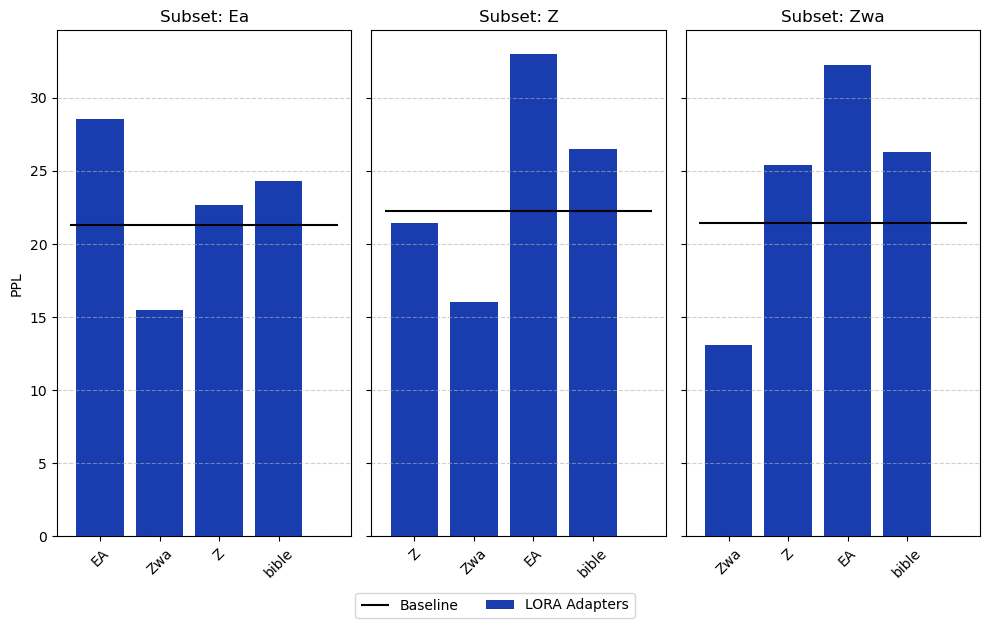

In [19]:
fig = plot_ppl(df, figsize=(10, 6))